In [1]:
# Import libraries
import numpy as np
import pandas as pd
from keras.layers import Dropout
import os
import cv2
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import keras
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline

Using TensorFlow backend.


In [2]:
# load files
train = pd.read_csv(r'C:\Users\sdinu\OneDrive\Documents\02 MS BA\04 Fall 2017\IDS594 Machine Learning with Python\02 Project\01 Dataset\train.csv')
test = pd.read_csv(r'C:\Users\sdinu\OneDrive\Documents\02 MS BA\04 Fall 2017\IDS594 Machine Learning with Python\02 Project\01 Dataset\test.csv')

In [3]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [7]:
# set path to read train and test image
TRAIN_PATH = 'C:/Users/sdinu/OneDrive/Documents/02 MS BA/04 Fall 2017/IDS594 Machine Learning with Python/02 Project/01 Dataset/train_img/'
TEST_PATH = 'C:/Users/sdinu/OneDrive/Documents/02 MS BA/04 Fall 2017/IDS594 Machine Learning with Python/02 Project/01 Dataset/test_img/'

In [8]:
# function to read images as arrays
def read_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128,128)) # you can resize to  (128,128) or (256,256)
    return img

In [9]:
# Read images and store it as an array
train_data = []
test_data = []
train_labels = train['label'].values

for img in tqdm(train['image_id'].values):
    train_data.append(read_image(TRAIN_PATH + '{}.png'.format(img)))

train_array = np.asarray(train_data)
    
for img in tqdm(test['image_id'].values):
    test_data.append(read_image(TEST_PATH + '{}.png'.format(img)))

test_array = np.asarray(test_data)
    
train_array = train_array.reshape(train_array.shape[0], 128, 128, 3).astype('float32')
test_array = test_array.reshape(test_array.shape[0], 128, 128, 3).astype('float32')

train_array /= 255
test_array /= 255
print(train_array.shape)
print(test_array.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 965/965 [00:10<00:00, 94.81it/s]


(2250, 128, 128, 3)
(965, 128, 128, 3)


In [10]:
# target variable - encoding numeric value
label_list = train['label'].tolist()
Y_train = {k:v for v,k in enumerate(set(label_list))}
y_train = [Y_train[k] for k in label_list]

label_list = test['label'].tolist()
Y_test = {k:v for v,k in enumerate(set(label_list))}
y_test = [Y_test[k] for k in label_list]

In [11]:
num_classes = 25
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
# Best Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu', kernel_initializer='zero',
                 input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='zero'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='zero'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='zero'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
    
optimizer = Adagrad(lr=0.005)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [13]:
history=model.fit(train_array, y_train, batch_size=128, epochs=10, validation_data=(test_array, y_test))

Train on 2250 samples, validate on 965 samples
Epoch 1/10
2250/2250 [==============================] - ETA: 72s - loss: 3.2564 - acc: 0.05 - ETA: 55s - loss: 3.3251 - acc: 0.03 - ETA: 46s - loss: 3.3114 - acc: 0.04 - ETA: 41s - loss: 3.2911 - acc: 0.04 - ETA: 36s - loss: 3.2828 - acc: 0.05 - ETA: 33s - loss: 3.2732 - acc: 0.06 - ETA: 30s - loss: 3.2675 - acc: 0.06 - ETA: 28s - loss: 3.2635 - acc: 0.05 - ETA: 24s - loss: 3.2626 - acc: 0.05 - ETA: 21s - loss: 3.2625 - acc: 0.05 - ETA: 18s - loss: 3.2608 - acc: 0.05 - ETA: 15s - loss: 3.2593 - acc: 0.05 - ETA: 12s - loss: 3.2583 - acc: 0.05 - ETA: 9s - loss: 3.2567 - acc: 0.0569 - ETA: 7s - loss: 3.2562 - acc: 0.055 - ETA: 4s - loss: 3.2548 - acc: 0.055 - ETA: 1s - loss: 3.2540 - acc: 0.056 - 54s - loss: 3.2534 - acc: 0.0564 - val_loss: 3.2145 - val_acc: 0.0632
Epoch 2/10
2250/2250 [==============================] - ETA: 42s - loss: 3.2155 - acc: 0.05 - ETA: 40s - loss: 3.2254 - acc: 0.05 - ETA: 37s - loss: 3.2219 - acc: 0.05 - ETA: 34s -

In [14]:
score = model.evaluate(test_array, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.18851141831
Test accuracy: 0.080829015544


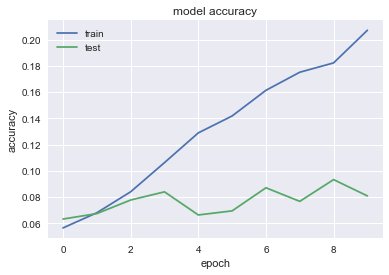

In [15]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

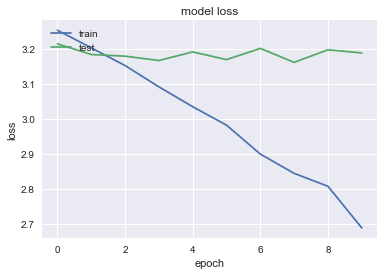

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()